# Comparision of Polynomial regression with Linear regression

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt

## Polynomial $x^n$

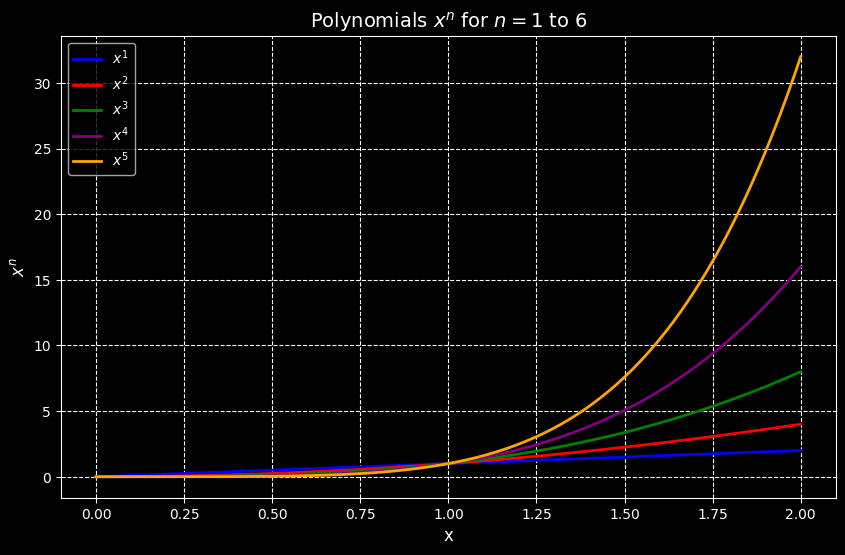

: 

: 

: 

In [ ]:
# Set dark background
plt.style.use('dark_background')

# Generate x values
x = np.linspace(0, 2, 200)

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot x^n for n = 1 to 6
colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan']
for n in range(1, 6):
    y = x**n
    plt.plot(x, y, color=colors[n-1], label=f'$x^{n}$', linewidth=2)

# Customize the plot
plt.title('Polynomials $x^n$ for $n=1$ to $6$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('$x^n$', fontsize=12)
plt.grid(True, linestyle='--')
plt.legend()

# Save the plot
plt.savefig('polynomial_plot.png', dpi=300, bbox_inches='tight')

In [ ]:

# Load the Fish dataset
file_path = "Fish.csv"
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,
  "vipullrathod/fish-market",
  file_path,)
df.info()

# Print all features
print("Original features in the dataset:")
print(df.columns.tolist())
print("First few rows of the original dataset:")
print(df.head())
print(df.describe())

# Select features and target
features_to_keep = ['Length1', 'Length2', 'Length3', 'Height', 'Width']  # Exclude Species and Weight
X = df[features_to_keep]
y = df['Weight']

# Print selected features
print("\nSelected features for modeling:")
print(X.columns.tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'kagglehub' is not defined

: 

: 

: 

In [ ]:

# --- Polynomial Regression ---
# Create and train the polynomial regression model (degree=2)
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)

# Make predictions
y_pred_poly = polyreg.predict(X_test)

# Calculate performance metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)


: 

: 

: 

In [ ]:


# --- Linear Regression ---
# Create and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Calculate performance metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

: 

: 

: 

In [ ]:
performance_data = [
    {'Model': 'Linear Regression', 'MSE': mse_lr, 'RMSE': rmse_lr, 'MAE': mae_lr, 'R-squared': r2_lr},
    {'Model': f'Polynomial Regression (degree={degree})', 'MSE': mse_poly, 'RMSE': rmse_poly, 'MAE': mae_poly, 'R-squared': r2_poly}
]
performance_df = pd.DataFrame(performance_data)
performance_df['MSE'] = performance_df['MSE'].round(2)
performance_df['RMSE'] = performance_df['RMSE'].round(2)
performance_df['MAE'] = performance_df['MAE'].round(2)
performance_df['R-squared'] = performance_df['R-squared'].round(2)

print("\nModel Performance Comparison:")
print(performance_df.to_string(index=False))


Model Performance Comparison:
                           Model      MSE   RMSE    MAE  R-squared
               Linear Regression 16763.89 129.48 103.91       0.88
Polynomial Regression (degree=5)  4655.85  68.23  47.04       0.97


: 

: 

: 

## showcasing overfitting with higher degrees

In [ ]:
# Import necessary libraries
from sklearn.pipeline import make_pipeline

# Load the Fish dataset
df = pd.read_csv('Fish.csv')

# Select features and target
features_to_keep = ['Length1', 'Length2', 'Length3', 'Height', 'Width']  # Exclude Species and Weight
X = df[features_to_keep]
y = df['Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store metrics
degrees = [2, 3, 4, 5]
results = []

# Train and evaluate polynomial regression models for each degree
for degree in degrees:
    # Create and train the polynomial regression model
    polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polyreg.fit(X_train, y_train)
    
    # Make predictions on training and testing sets
    y_pred_train = polyreg.predict(X_train)
    y_pred_test = polyreg.predict(X_test)
    
    # Calculate performance metrics for training set
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    # Calculate performance metrics for testing set
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    # Store results
    results.append({
        'Degree': degree,
        'R-squared (Train)': r2_train,
        'R-squared (Test)': r2_test,
        'RMSE (Train)': rmse_train,
        'RMSE (Test)': rmse_test,
        'MAE (Train)': mae_train,
        'MAE (Test)': mae_test
    })

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Format the DataFrame for better readability
results_df['R-squared (Train)'] = results_df['R-squared (Train)'].round(4)
results_df['R-squared (Test)'] = results_df['R-squared (Test)'].round(4)
results_df['RMSE (Train)'] = results_df['RMSE (Train)'].round(2)
results_df['RMSE (Test)'] = results_df['RMSE (Test)'].round(2)
results_df['MAE (Train)'] = results_df['MAE (Train)'].round(2)
results_df['MAE (Test)'] = results_df['MAE (Test)'].round(2)

# Print the comparison table
print("\nPolynomial Regression Performance Comparison by Degree (Train and Test):")
print(results_df.to_string(index=False))


Polynomial Regression Performance Comparison by Degree (Train and Test):
 Degree  R-squared (Train)  R-squared (Test)  RMSE (Train)  RMSE (Test)  MAE (Train)  MAE (Test)
      2             0.9850            0.9673         43.01        68.23        28.44       47.04
      3             0.9916            0.9488         32.10        85.35        22.89       54.59
      4             0.9999         -422.8700          3.14      7764.73         0.39     3132.86
      5             0.9999         -428.9179          3.14      7819.92         0.39     2257.95


: 

: 

: 